In [34]:
using Symbolics

One normally assumes that the parameters $σ, ρ, \text{ and } β$ are positive. Lorenz used the values $σ = 10, β = \frac{8}{3} \text{ and } ρ = 28.$

In [35]:
function lorenz!(dᵤ, u, p, t)
    σ = 10.0
    β = 8/3
    ρ = 28.0
    dᵤ[1] = σ * (u[2] - u[1])
    dᵤ[2] = u[1] * ( ρ - u[3]) - u[2]
    dᵤ[3] = u[1] * u[2] - β * u[3]
end;

In [36]:
@variables t x(t) y(t) z(t) dx(t) dy(t) dz(t) σ ρ β

10-element Vector{Num}:
     t
  x(t)
  y(t)
  z(t)
 dx(t)
 dy(t)
 dz(t)
     σ
     ρ
     β

In [37]:
u = [x,y,z]

3-element Vector{Num}:
 x(t)
 y(t)
 z(t)

In [38]:
dᵤ = [dx,dy,dz]

3-element Vector{Num}:
 dx(t)
 dy(t)
 dz(t)

In [39]:
p = [σ,ρ,β]

3-element Vector{Num}:
 σ
 ρ
 β

In [40]:
lorenz!(dᵤ,u,p,t);

In [41]:
dᵤ

3-element Vector{Num}:
               10.0(-x(t) + y(t))
 -y(t) + x(t)*(28.0 - z(t))
               -2.6666666666666665z(t) + x(t)*y(t)

In [42]:
using DifferentialEquations

In [43]:
𝐹 = ODEProblem

ODEProblem

In [44]:
u₀ = [1.0, 0.0, 0.0]  # Initial conditions
𝑆 = (0.0, 1.0)    # Time span

(0.0, 1.0)

In [45]:
prob = 𝐹(lorenz!, u₀, 𝑆)
sol = solve(prob);

In [46]:
using Plots

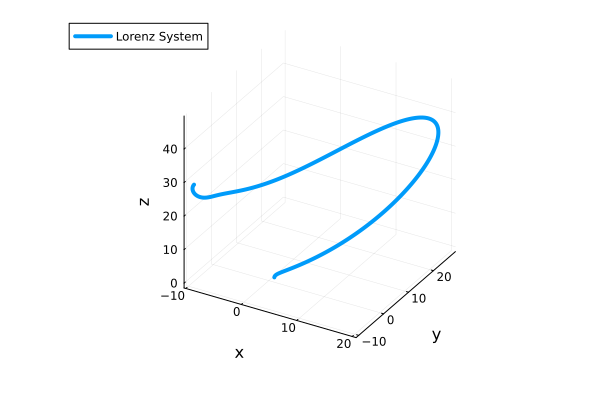

In [47]:
plot(sol, vars=(1, 2, 3), label="Lorenz System", xlabel="x", ylabel="y", zlabel="z", linewidth=4)

[ Info: Saved animation to /Users/valiha/Developer/MIT_OCW_Linear_Algebra_18_06/tmp.gif


Plots.AnimatedGif("/Users/valiha/Developer/MIT_OCW_Linear_Algebra_18_06/tmp.gif")
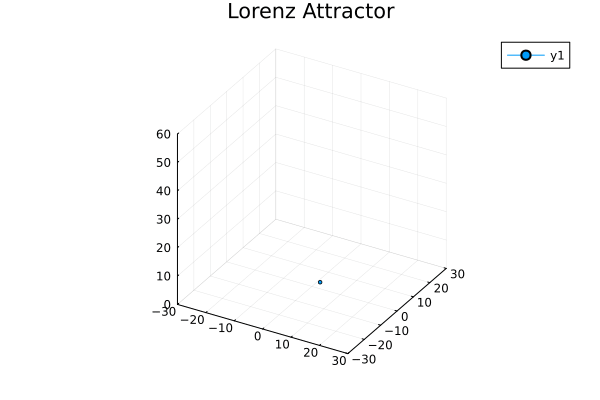

In [48]:
# define the Lorenz attractor
@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 2
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x);         l.x += l.dt * dx
    dy = l.x * (l.ρ - l.z) - l.y;   l.y += l.dt * dy
    dz = l.x * l.y - l.β * l.z;     l.z += l.dt * dz
end

attractor = Lorenz()

# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

# References
- [ ] [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system)
- [ ] [The Lorenz Attractor Explained](https://www.youtube.com/watch?v=VjP90rwpBwU)
- [ ] [The Lorenz Attractor Animation| Butterfly Effect| Lorenz System](https://www.youtube.com/watch?v=q3kNHomvU0k)